In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fbprophet as fbp
import sklearn

In [2]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,StratifiedKFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso,SGDRegressor
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.svm import SVR

In [3]:
df = pd.read_csv(r"Desktop\PGP-DSE Data\Machine Learning\Avocado Prices Dataset\avocado.csv")
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  27-12-2015          1.33      64236.62  1036.74   54454.85   
1           1  20-12-2015          1.35      54876.98   674.28   44638.81   
2           2  13-12-2015          0.93     118220.22   794.70  109149.67   
3           3  06-12-2015          1.08      78992.15  1132.00   71976.41   
4           4  29-11-2015          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [4]:
df.shape

(18249, 14)

In [5]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

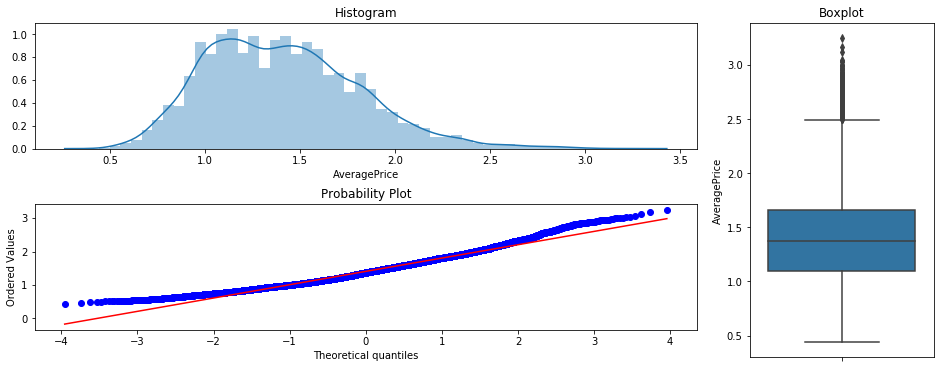

In [32]:
import matplotlib.gridspec as gridspec
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
def plotting_3_charts(df1,feature):
    fig = plt.figure(constrained_layout=True,figsize=(13,5))
    grid = gridspec.GridSpec(ncols=3,nrows=3,figure=fig)
    
    ax1 = fig.add_subplot(grid[0,:2])
    ax1.set_title("Histogram")
    sns.distplot(df1.loc[:,feature],norm_hist=True,ax=ax1)
    
    ax2 = fig.add_subplot(grid[1,:2])
    ax2.set_title("Q-Q Plot")
    stats.probplot(df1.loc[:,feature],plot=ax2)
    
    ax3 = fig.add_subplot(grid[:,2])
    ax3.set_title("Boxplot")
    sns.boxplot(df1.loc[:,feature],orient='v',ax=ax3)

plotting_3_charts(df,'AveragePrice')

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null datetime64[ns]
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [8]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
df.head()

Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0           0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1 2015-12-20          1.35      54876.98   674.28   44638.81   
2           2 2015-12-13          0.93     118220.22   794.70  109149.67   
3           3 2015-06-12          1.08      78992.15  1132.00   71976.41   
4           4 2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  Month  
0  2015  Albany     12  
1  2015  Albany     12  
2  2015  Albany     12  
3  2015  Albany      6  
4  2015  Albany     11

In [9]:
df['type'] = df['type'].replace({'conventional':'Conventional','organic':'Organic'})

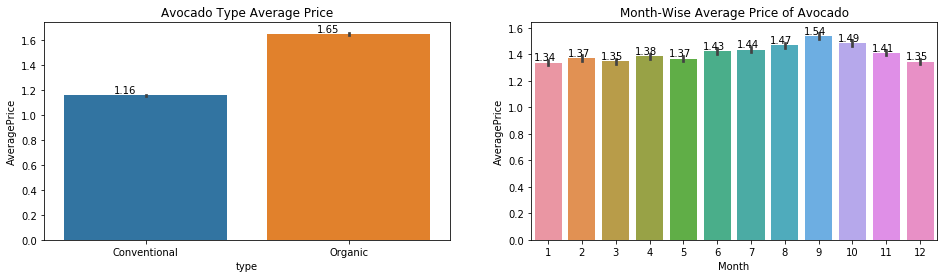

In [10]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(1, 2, figsize=(16,4))
graph = sns.barplot(x='type',y='AveragePrice',data=df,estimator=np.mean,ax=axes[0])
axes[0].set_title("Avocado Type Average Price")
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')
graph = sns.barplot(x='Month',y='AveragePrice',data=df,estimator=np.mean,ax=axes[1])
axes[1].set_title("Month-Wise Average Price of Avocado")
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

In [11]:
df_2015 = df[df['year']==2015]
df_2016 = df[df['year']==2016]
df_2017 = df[df['year']==2017]
df_2018 = df[df['year']==2018]

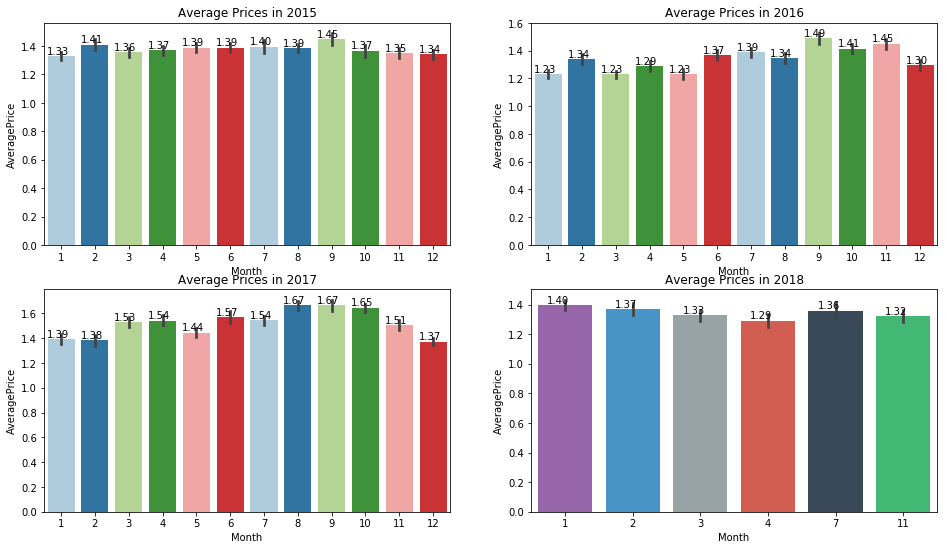

In [12]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(2, 2, figsize=(16,9))
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
graph = sns.barplot(x='Month',y='AveragePrice',data=df_2015,estimator=np.mean,ax=axes[0,0],palette=sns.color_palette("Paired"))
axes[0,0].set_title("Average Prices in 2015")
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

graph = sns.barplot(x='Month',y='AveragePrice',data=df_2016,estimator=np.mean,ax=axes[0,1],palette=sns.color_palette("Paired"))
axes[0,1].set_title("Average Prices in 2016")
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

graph = sns.barplot(x='Month',y='AveragePrice',data=df_2017,estimator=np.mean,ax=axes[1,0],palette=sns.color_palette("Paired"))
axes[1,0].set_title("Average Prices in 2017")
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

graph = sns.barplot(x='Month',y='AveragePrice',data=df_2018,estimator=np.mean,ax=axes[1,1],palette=sns.color_palette(flatui))
axes[1,1].set_title("Average Prices in 2018")
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

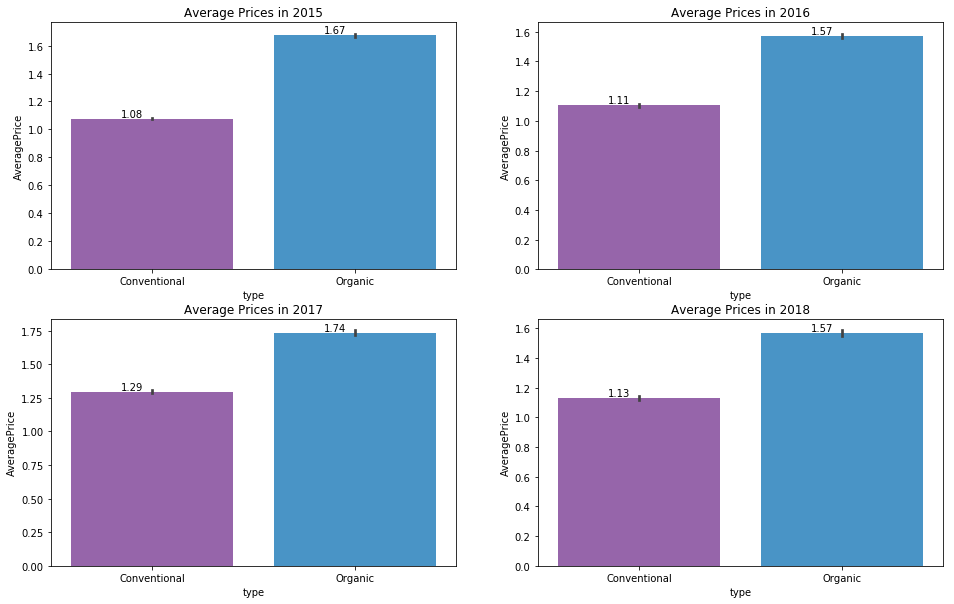

In [13]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(2, 2, figsize=(16,10))
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
graph = sns.barplot(x='type',y='AveragePrice',data=df_2015,estimator=np.mean,ax=axes[0,0],palette=sns.color_palette(flatui))
axes[0,0].set_title("Average Prices in 2015")
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

graph = sns.barplot(x='type',y='AveragePrice',data=df_2016,estimator=np.mean,ax=axes[0,1],palette=sns.color_palette(flatui))
axes[0,1].set_title("Average Prices in 2016")
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

graph = sns.barplot(x='type',y='AveragePrice',data=df_2017,estimator=np.mean,ax=axes[1,0],palette=sns.color_palette(flatui))
axes[1,0].set_title("Average Prices in 2017")
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

graph = sns.barplot(x='type',y='AveragePrice',data=df_2018,estimator=np.mean,ax=axes[1,1],palette=sns.color_palette(flatui))
axes[1,1].set_title("Average Prices in 2018")
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

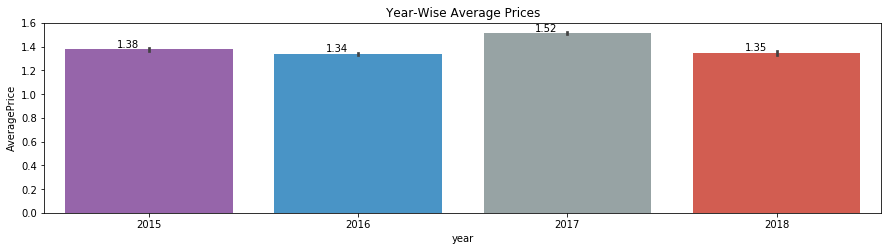

In [14]:
import warnings
warnings.filterwarnings("ignore")
# f, axes = plt.subplots(2, 1, figsize=(16,10))
plt.figure(figsize=(15,3.5))

graph = sns.barplot(x='year',y='AveragePrice',data=df,estimator=np.mean,palette=sns.color_palette(flatui))
plt.title("Year-Wise Average Prices")
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

# graph = sns.barplot(x='region',y='AveragePrice',data=df,estimator=np.mean,ax=axes[1])
# axes[1].set_title("Region-Wise Average Prices")
# for p in graph.patches:
#     graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')

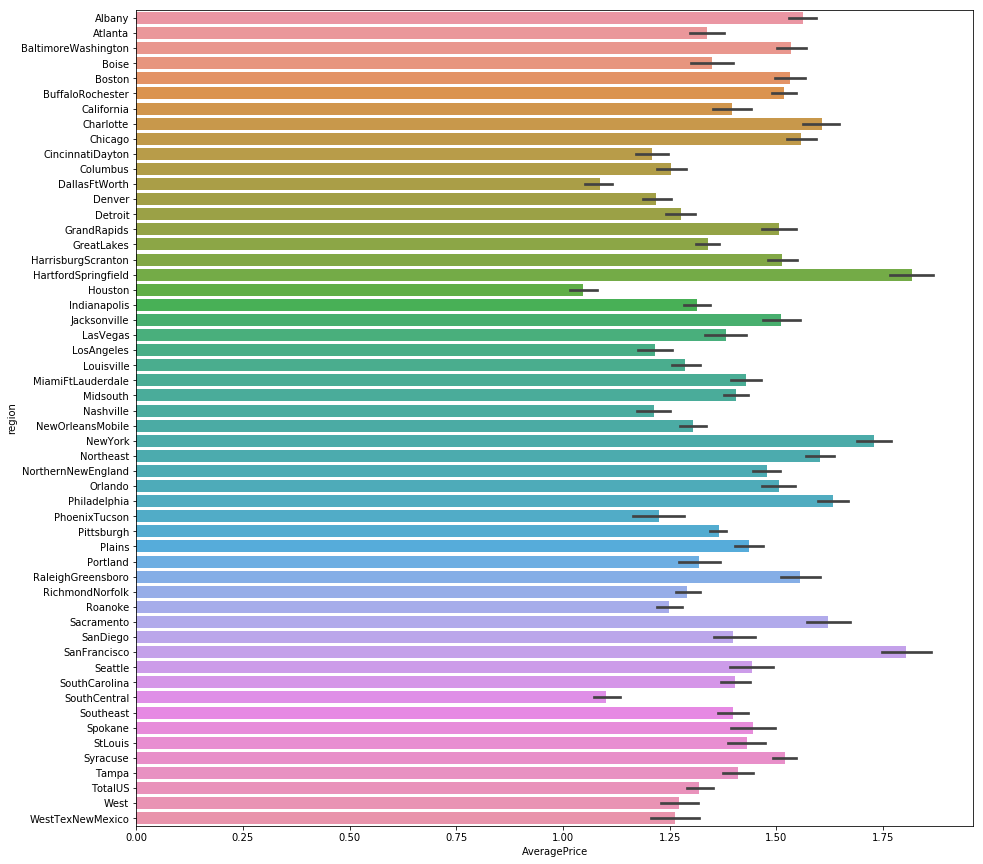

In [15]:
plt.figure(figsize=(15,15))
graph = sns.barplot(x='AveragePrice',y='region',data=df,estimator=np.mean)

Text(0.5,1,'Region-Wise Average Prices for 2018')

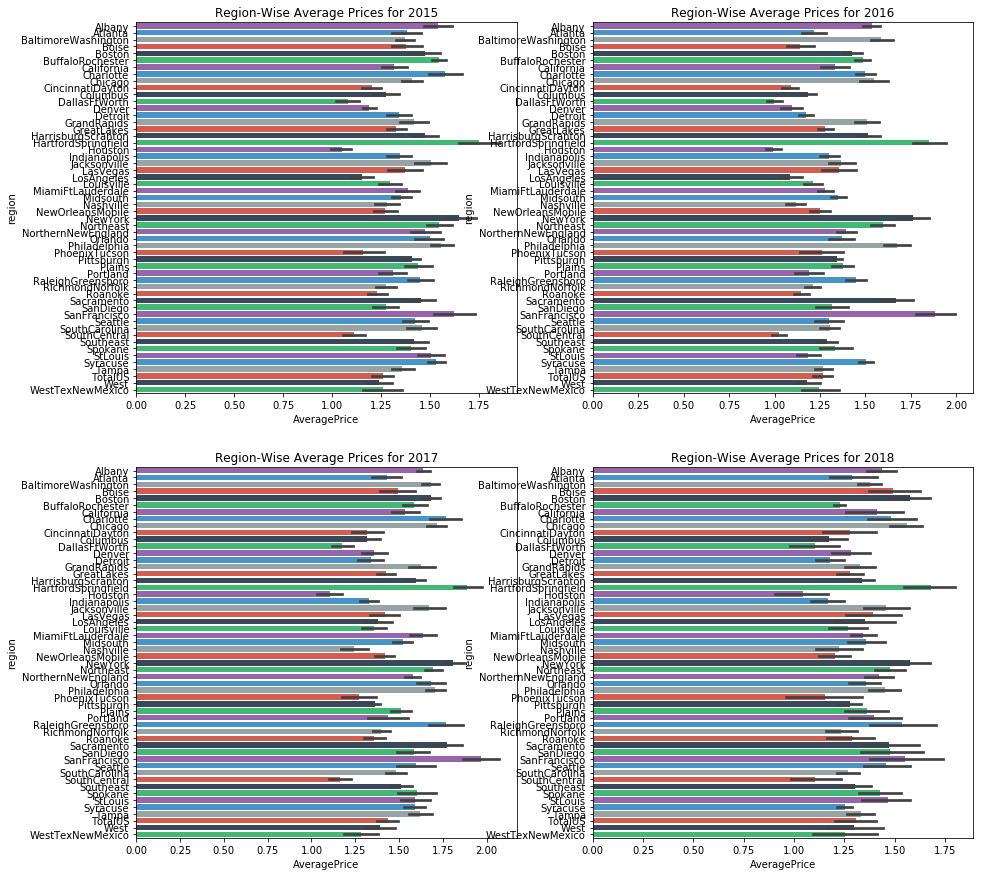

In [16]:
import warnings
warnings.filterwarnings("ignore")
f, axes = plt.subplots(2, 2, figsize=(15,15))
graph = sns.barplot(x='AveragePrice',y='region',data=df_2015,estimator=np.mean,palette=sns.color_palette(flatui),ax=axes[0,0])
axes[0,0].set_title("Region-Wise Average Prices for 2015")

graph = sns.barplot(x='AveragePrice',y='region',data=df_2016,estimator=np.mean,palette=sns.color_palette(flatui),ax=axes[0,1])
axes[0,1].set_title("Region-Wise Average Prices for 2016")

graph = sns.barplot(x='AveragePrice',y='region',data=df_2017,estimator=np.mean,palette=sns.color_palette(flatui),ax=axes[1,0])
axes[1,0].set_title("Region-Wise Average Prices for 2017")

graph = sns.barplot(x='AveragePrice',y='region',data=df_2018,estimator=np.mean,palette=sns.color_palette(flatui),ax=axes[1,1])
axes[1,1].set_title("Region-Wise Average Prices for 2018")

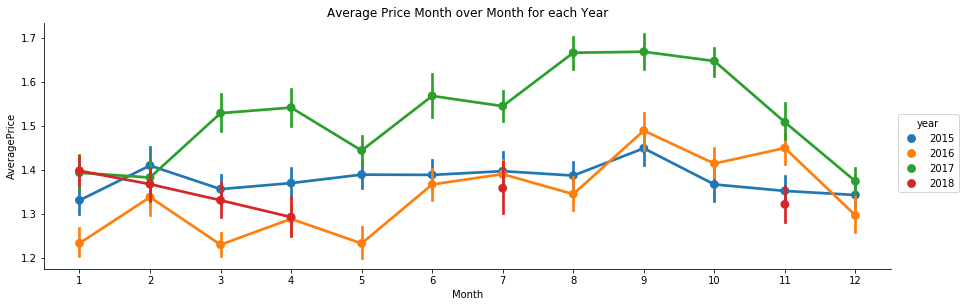

In [17]:
sns.factorplot(x='Month',y='AveragePrice',data=df,hue='year',size=4.2,aspect=3)
plt.title("Average Price Month over Month for each Year")
plt.show()

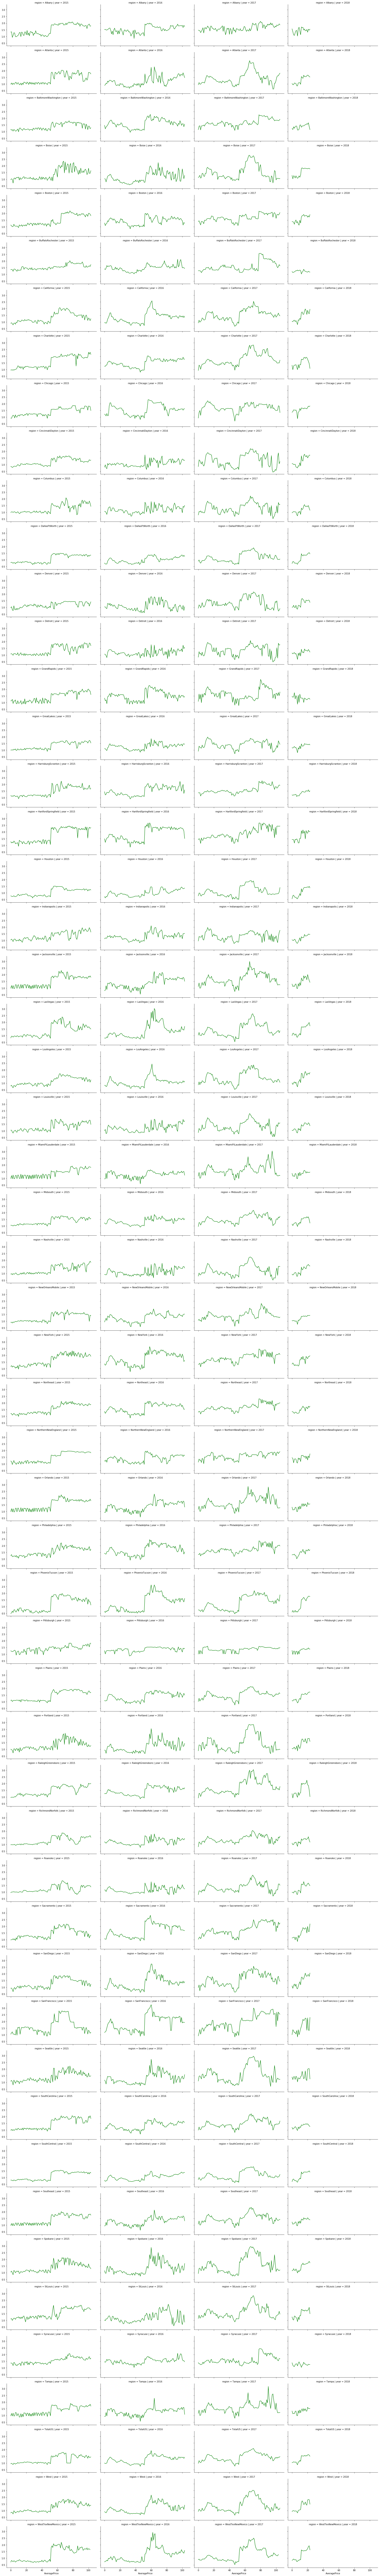

In [18]:
g = sns.FacetGrid(col='year',row='region',data=df,size=3,aspect=2)
g = g.map(plt.plot,'AveragePrice',color='g')

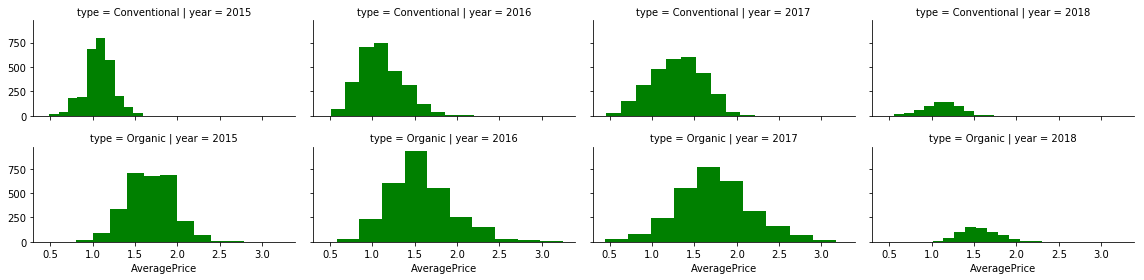

In [19]:
g = sns.FacetGrid(col='year',row='type',data=df,size=2,aspect=2)
g = g.map(plt.hist,'AveragePrice',color='g')

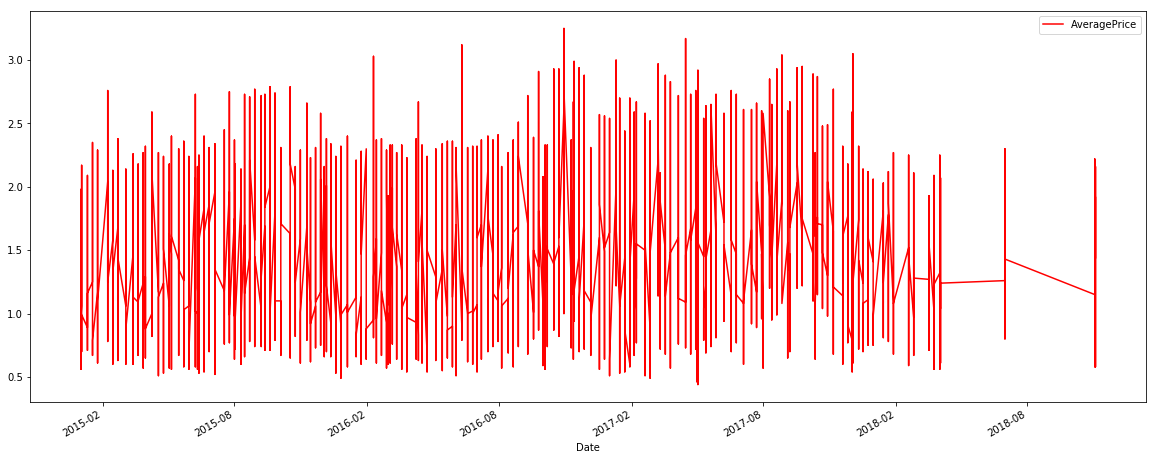

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
df.set_index('Date').plot(y='AveragePrice', ax=ax, color='r')

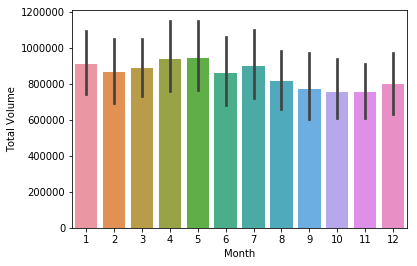

In [21]:
sns.barplot(x='Month',y='Total Volume',data=df)

UsageError: Line magic function `%matplotlib.inline` not found.


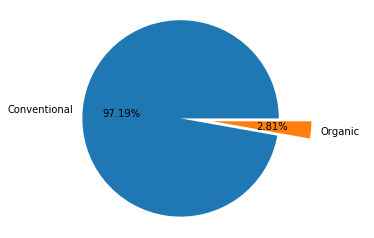

In [338]:
l1 = [sum(df[df['type']=='Conventional']['Total Volume']),sum(df[df['type']=='Organic']['Total Volume'])]
l2 = ['Conventional','Organic']
plt.pie(l1,labels=l2,radius=3,autopct='%0.2f%%',explode=[0,1.0])
plt.axis('equal')
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


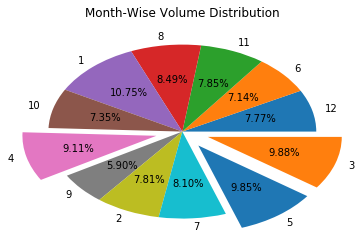

In [337]:
l1 = []
for i in df['Month'].unique():
    l1.append(sum(df[df['Month']==i]['Total Volume']))
plt.pie(l1,labels=df['Month'].unique(),autopct='%0.2f%%',explode=[0,0,0,0,0,0,0.2,0,0,0,0.2,0.2],radius=1)
plt.title("Month-Wise Volume Distribution")
#plt.axis("equal")
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


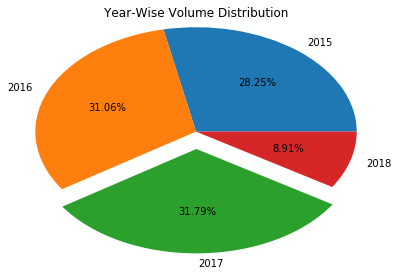

In [333]:
l1 = []
for i in df['year'].unique():
    l1.append(sum(df[df['year']==i]['Total Volume']))
plt.pie(l1,labels=df['year'].unique(),autopct='%0.2f%%',radius=1.2,explode=[0,0,0.2,0])
plt.title("Year-Wise Volume Distribution")
%matplotlib.inline

In [36]:
df.drop('Unnamed: 0',axis=1,inplace=True)

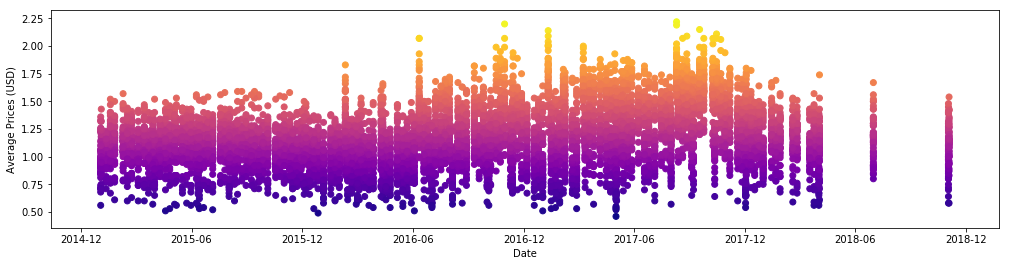

In [52]:
plt.figure(figsize=(17,4))
date = df[df['type']=='Conventional']['Date'].tolist()
avgPrice = df[df['type']=='Conventional']['AveragePrice'].tolist()
plt.scatter(date,avgPrice,c=avgPrice,cmap='plasma')
plt.xlabel('Date',fontsize=10)
plt.ylabel('Average Prices (USD)',fontsize=10)
plt.show()

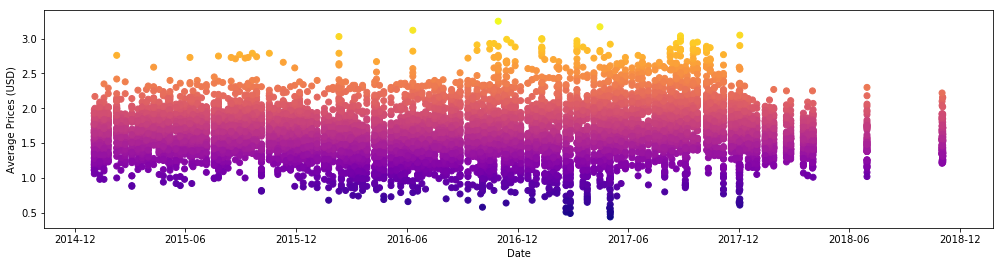

In [53]:
plt.figure(figsize=(17,4))
date = df[df['type']=='Organic']['Date'].tolist()
avgPrice = df[df['type']=='Organic']['AveragePrice'].tolist()
plt.scatter(date,avgPrice,c=avgPrice,cmap='plasma')
plt.xlabel('Date',fontsize=10)
plt.ylabel('Average Prices (USD)',fontsize=10)
plt.show()

# Let's do some Time Series Analysis

In [57]:
cols = ['Date','AveragePrice']
df_time = df[cols]
df_time.sort_values(by=['Date'],inplace=True,ascending=True)
#df_time = df_time.set_index('Date')

In [58]:
p = fbp.Prophet(interval_width=0.5,yearly_seasonality=True,weekly_seasonality=False,changepoint_range=1)
p.add_seasonality(name='monthly',period=30.5,fourier_order=5,prior_scale=0.02)
df_time.columns = ['ds','y']
p.fit(df_time)
future = p.make_future_dataframe(freq='w',periods=4)
future.head()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
0 2015-01-02
1 2015-01-02
2 2015-01-02
3 2015-01-02
4 2015-01-02

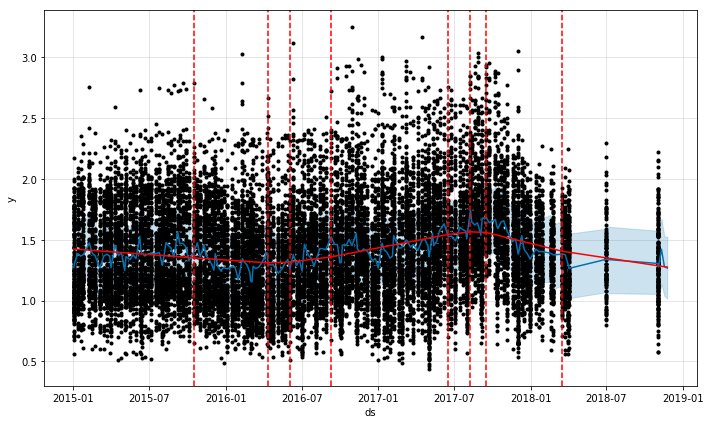

In [59]:
from fbprophet.plot import add_changepoints_to_plot
forecast = p.predict(future)
fig = p.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),p,forecast)

In [62]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
18248 2018-11-03  1.285110    1.036318    1.554566
18249 2018-11-04  1.276500    1.017695    1.544477
18250 2018-11-11  1.422533    1.137680    1.672839
18251 2018-11-18  1.280522    1.038981    1.525288
18252 2018-11-25  1.267877    1.017213    1.527153

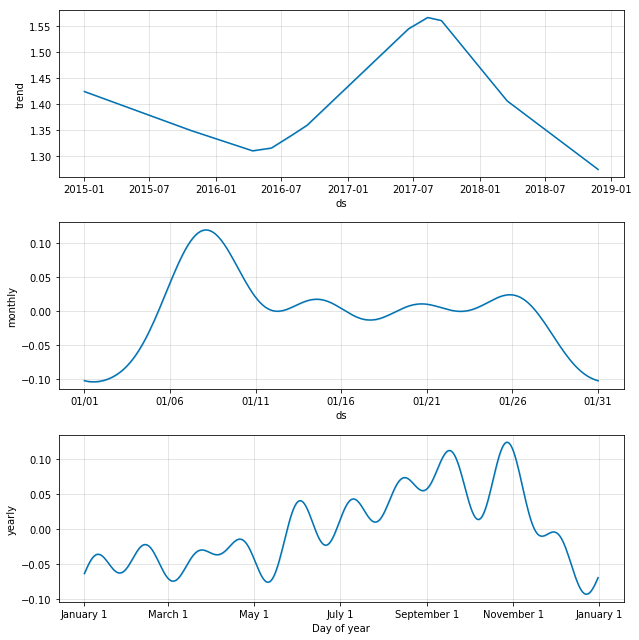

In [60]:
fig2 = p.plot_components(forecast)

In [64]:
from fbprophet.diagnostics import cross_validation,performance_metrics
df_cv = cross_validation(p,initial='365 days',period='30 days',horizon='30 days')
df_cv.tail()

INFO:fbprophet.diagnostics:Making 29 forecasts with cutoffs between 2016-01-14 00:00:00 and 2018-10-04 00:00:00


ds      yhat  yhat_lower  yhat_upper     y     cutoff
12521 2018-11-03  1.179705    0.907740    1.442703  1.09 2018-10-04
12522 2018-11-03  1.179705    0.927611    1.438334  1.12 2018-10-04
12523 2018-11-03  1.179705    0.928221    1.445840  1.26 2018-10-04
12524 2018-11-03  1.179705    0.908556    1.423719  1.32 2018-10-04
12525 2018-11-03  1.179705    0.912353    1.444857  1.44 2018-10-04

In [67]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.tail()

horizon       mse      rmse       mae      mape  coverage
6232  30 days  0.181788  0.426365  0.330718  0.233252  0.483227
6233  30 days  0.181773  0.426348  0.330657  0.233212  0.483227
6234  30 days  0.181621  0.426170  0.330435  0.232864  0.484026
6223  30 days  0.182046  0.426668  0.330776  0.232780  0.484026
12525 30 days  0.182037  0.426658  0.330759  0.232702  0.484824

In [68]:
print(np.mean(df_p['mape']))
print(np.mean(df_p['rmse']))

0.24967521874434193
0.401562054884904


In [75]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-06-12          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     8696.87     8603.62       93.25          0.0  Conventional  2015   
1     9505.56     9408.07       97.49          0.0  Conventional  2015   
2     8145.35     8042.21      103.14          0.0  Conventional  2015   
3     5811.16     5677.40      133.76          0.0  Conventional  2015   
4     6183.95     5986.26      197.69          0.0  Conventional  2015   

   region  Month  
0  Albany     12  
1  Albany     12  
2  Albany     12  
3  Albany      6  
4  Albany     11

In [76]:
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  \
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000   
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899   
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000   
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000   
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000   
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000   
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000   

              Month  
count  18249.000000  
mean       6.372842  
std        3.525034  
min        1.000000  
25%        3.000000  
50%        6.000000  
75%       10.000000  
max       12.000000

In [77]:
df1 = df.drop(['Date','AveragePrice'],axis=1)
target = df['AveragePrice']

In [79]:
df1.head()

Total Volume     4046       4225    4770  Total Bags  Small Bags  \
0      64236.62  1036.74   54454.85   48.16     8696.87     8603.62   
1      54876.98   674.28   44638.81   58.33     9505.56     9408.07   
2     118220.22   794.70  109149.67  130.50     8145.35     8042.21   
3      78992.15  1132.00   71976.41   72.58     5811.16     5677.40   
4      51039.60   941.48   43838.39   75.78     6183.95     5986.26   

   Large Bags  XLarge Bags          type  year  region  Month  
0       93.25          0.0  Conventional  2015  Albany     12  
1       97.49          0.0  Conventional  2015  Albany     12  
2      103.14          0.0  Conventional  2015  Albany     12  
3      133.76          0.0  Conventional  2015  Albany      6  
4      197.69          0.0  Conventional  2015  Albany     11

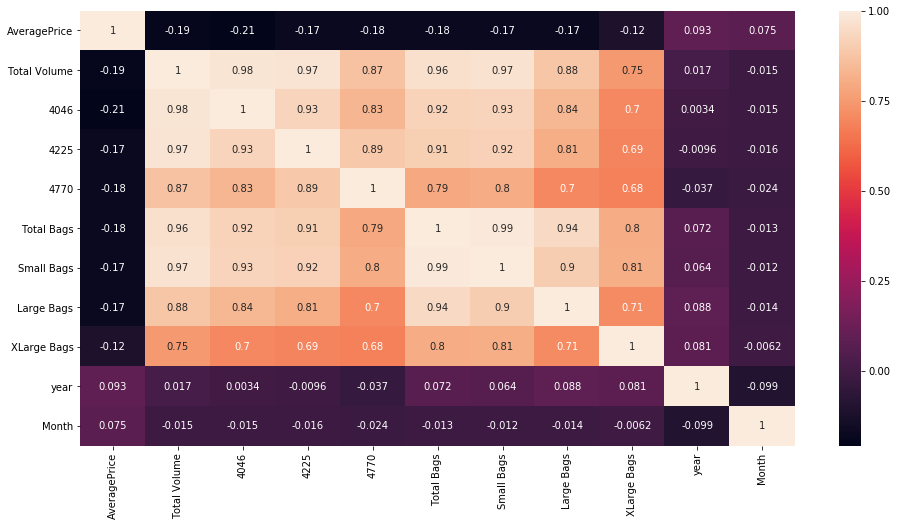

In [83]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)

In [85]:
df1.drop(['Total Volume','Total Bags'],axis=1,inplace=True)

In [87]:
fe = df1.groupby('region').size()/len(df1)
df1['region'] = df1['region'].map(fe)

fe = df1.groupby('type').size()/len(df1)
df1['type'] = df1['type'].map(fe)

In [225]:
df1['4046'] = (df1['4046']-df1['4046'].min())/(df1['4046'].max()-df1['4046'].min())
df1['4225'] = (df1['4225']-df1['4225'].min())/(df1['4225'].max()-df1['4225'].min())
df1['4770'] = (df1['4770']-df1['4770'].min())/(df1['4770'].max()-df1['4770'].min())
df1['Small Bags'] = (df1['Small Bags']-df1['Small Bags'].min())/(df1['Small Bags'].max()-df1['Small Bags'].min())
df1['Large Bags'] = (df1['Large Bags']-df1['Large Bags'].min())/(df1['Large Bags'].max()-df1['Large Bags'].min())
df1['XLarge Bags'] = (df1['XLarge Bags']-df1['XLarge Bags'].min())/(df1['XLarge Bags'].max()-df1['XLarge Bags'].min())

In [251]:
df1['year'] = np.log(df1['year'])
df1['Month'] = np.log(df1['Month'])

In [252]:
df1.head()

4046      4225      4770  Small Bags  Large Bags  XLarge Bags  \
0  0.000046  0.002660  0.000019    0.000643    0.000016          0.0   
1  0.000030  0.002181  0.000023    0.000703    0.000017          0.0   
2  0.000035  0.005332  0.000051    0.000601    0.000018          0.0   
3  0.000050  0.003516  0.000029    0.000424    0.000023          0.0   
4  0.000041  0.002142  0.000030    0.000447    0.000035          0.0   

       type      year    region     Month  
0  0.500082  7.608374  0.018522  2.484907  
1  0.500082  7.608374  0.018522  2.484907  
2  0.500082  7.608374  0.018522  2.484907  
3  0.500082  7.608374  0.018522  1.791759  
4  0.500082  7.608374  0.018522  2.397895

In [253]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, target, test_size=0.20, random_state=17)

In [97]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [254]:
reg1 = LinearRegression().fit(X_train,y_train)
y_pred1 = reg1.predict(X_test)
y_pred2 = reg1.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,y_pred2)))
a = cross_val_score(reg1,X_train,y_train,scoring='neg_mean_squared_error',cv=25)
print("%.3f (+/-%.3f)"%(a.mean(),a.std()))
print()
print(np.sqrt(mean_squared_error(y_test,y_pred1)))
a = cross_val_score(reg1,X_test,y_test,scoring='neg_mean_squared_error',cv=25)
print("%.3f (+/-%.3f)"%(a.mean(),a.std()))

0.3062507400931275
-0.094 (+/-0.007)

0.3118070141177391
-0.097 (+/-0.009)


In [255]:
reg2 = Ridge(alpha=0.00000000000001,random_state=5).fit(X_train,y_train)
y_pred1 = reg2.predict(X_test)
y_pred2 = reg2.predict(X_train)
print("Training Score:",reg2.score(X_train,y_train))
print("Validating Score:",reg2.score(X_test,y_test))
print()
print(np.sqrt(mean_squared_error(y_train,y_pred2)))
a = cross_val_score(reg2,X_train,y_train,scoring='neg_mean_squared_error',cv=25)
print("%.3f (+/-%.3f)"%(a.mean(),a.std()))
print()
print(np.sqrt(mean_squared_error(y_test,y_pred1)))
a = cross_val_score(reg2,X_test,y_test,scoring='neg_mean_squared_error',cv=25)
print("%.3f (+/-%.3f)"%(a.mean(),a.std()))

Training Score: 0.42029236798177594
Validating Score: 0.405511950108592

0.30625074009311515
-0.094 (+/-0.007)

0.3118070141180098
-0.097 (+/-0.009)


Training Score: 0.8007453346444555
Validating Score: 0.6890029075599764

Training Data RMSE: 0.17954647671475352
-0.050 (+/-0.004)

Validation Data RMSE: 0.22552385174671521
-0.069 (+/-0.013)


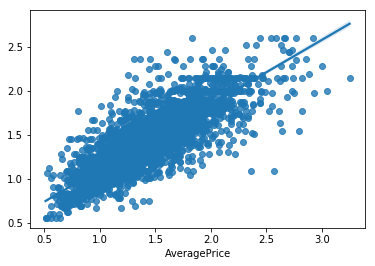

In [259]:
reg3 = DecisionTreeRegressor(max_depth=12,min_samples_leaf=12,random_state=17).fit(X_train,y_train)
y_pred1 = reg3.predict(X_test)
y_pred2 = reg3.predict(X_train)
print("Training Score:",reg3.score(X_train,y_train))
print("Validating Score:",reg3.score(X_test,y_test))
print()
print("Training Data RMSE:",np.sqrt(mean_squared_error(y_train,y_pred2)))
a = cross_val_score(reg3,X_train,y_train,scoring='neg_mean_squared_error',cv=25)
print("%.3f (+/-%.3f)"%(a.mean(),a.std()))
print()
print("Validation Data RMSE:",np.sqrt(mean_squared_error(y_test,y_pred1)))
a = cross_val_score(reg3,X_test,y_test,scoring='neg_mean_squared_error',cv=25)
print("%.3f (+/-%.3f)"%(a.mean(),a.std()))
sns.regplot(x=y_test,y=y_pred1,truncate=True)

Training Score: 0.8302228183974668
Validating Score: 0.7573582029835105

Training Prediction: 0.16573426162458507
-0.040 (+/-0.003)

Validation Prediction: 0.19920357250567214
-0.049 (+/-0.005)


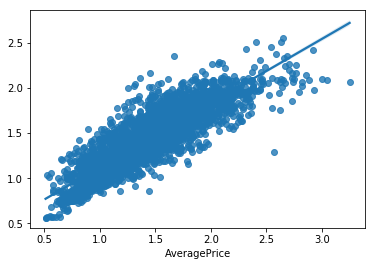

In [260]:
reg4 = RandomForestRegressor(n_estimators=50,max_depth=10,min_samples_split=6).fit(X_train,y_train)
y_pred1 = reg4.predict(X_test)
y_pred2 = reg4.predict(X_train)
print("Training Score:",reg4.score(X_train,y_train))
print("Validating Score:",reg4.score(X_test,y_test))
print()
print("Training Prediction:",np.sqrt(mean_squared_error(y_train,y_pred2)))
a = cross_val_score(reg4,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
print("%.3f (+/-%.3f)"%(a.mean(),a.std()))
print()
print("Validation Prediction:",np.sqrt(mean_squared_error(y_test,y_pred1)))
a = cross_val_score(reg4,X_test,y_test,scoring='neg_mean_squared_error',cv=10)
print("%.3f (+/-%.3f)"%(a.mean(),a.std()))
sns.regplot(x=y_test,y=y_pred1,truncate=True)

Training Score: 0.9454053293208495
Validation Score: 0.8131256847758432

Training Data RMSE: 0.0939826665925671
-0.032 (+/-0.002)

Validation Data RMSE: 0.1748191977997938
-0.046 (+/-0.005)


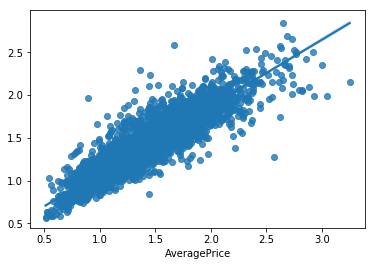

In [262]:
reg5 = GradientBoostingRegressor(n_estimators=50,min_samples_leaf=5,max_depth=10).fit(X_train,y_train)
y_pred1 = reg5.predict(X_test)
y_pred2 = reg5.predict(X_train)
print("Training Score:",reg5.score(X_train,y_train))
print("Validation Score:",reg5.score(X_test,y_test))
print()
print("Training Data RMSE:",np.sqrt(mean_squared_error(y_train,y_pred2)))
a = cross_val_score(reg5,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
print("%.3f (+/-%.3f)"%(a.mean(),a.std()))
print()
print("Validation Data RMSE:",np.sqrt(mean_squared_error(y_test,y_pred1)))
a = cross_val_score(reg5,X_test,y_test,scoring='neg_mean_squared_error',cv=5)
print("%.3f (+/-%.3f)"%(a.mean(),a.std()))
sns.regplot(x=y_test,y=y_pred1,truncate=True)

Training Score: 0.7560428711288432
Validation Score: 0.7046445471559539

Training Data RMSE: 0.19866867469677588
-0.051 (+/-0.001)

Validation Data RMSE: 0.21977931350875266
-0.066 (+/-0.004)


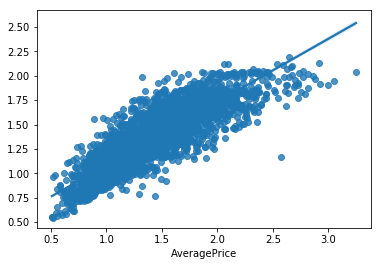

In [265]:
from xgboost import XGBRFRegressor
import warnings
warnings.filterwarnings("ignore")
reg6 = XGBRFRegressor(max_depth=12,learning_rate=0.95,n_estimators=60,random_state=5,objective='reg:squarederror').fit(X_train,y_train)
y_pred1 = reg6.predict(X_test)
y_pred2 = reg6.predict(X_train)
print("Training Score:",reg6.score(X_train,y_train))
print("Validation Score:",reg6.score(X_test,y_test))
print()
print("Training Data RMSE:",np.sqrt(mean_squared_error(y_train,y_pred2)))
a = cross_val_score(reg6,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
print("%.3f (+/-%.3f)"%(a.mean(),a.std()))
print()
print("Validation Data RMSE:",np.sqrt(mean_squared_error(y_test,y_pred1)))
a = cross_val_score(reg6,X_test,y_test,scoring='neg_mean_squared_error',cv=5)
print("%.3f (+/-%.3f)"%(a.mean(),a.std()))
sns.regplot(x=y_test,y=y_pred1,truncate=True)

Training Score: 0.42029236798175773
Validation Score: 0.40551195010955743

Training Data RMSE: 0.3062507400931199
-0.094 (+/-0.003)

Validation Data RMSE: 0.31180701411775663
-0.097 (+/-0.004)


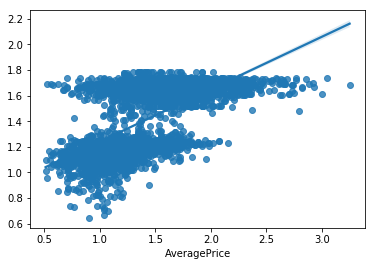

In [266]:
reg7 = Lasso(alpha=0.0000000000000001).fit(X_train,y_train)
y_pred1 = reg7.predict(X_test)
y_pred2 = reg7.predict(X_train)
print("Training Score:",reg7.score(X_train,y_train))
print("Validation Score:",reg7.score(X_test,y_test))
print()
print("Training Data RMSE:",np.sqrt(mean_squared_error(y_train,y_pred2)))
a = cross_val_score(reg7,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
print("%.3f (+/-%.3f)"%(a.mean(),a.std()))
print()
print("Validation Data RMSE:",np.sqrt(mean_squared_error(y_test,y_pred1)))
a = cross_val_score(reg7,X_test,y_test,scoring='neg_mean_squared_error',cv=5)
print("%.3f (+/-%.3f)"%(a.mean(),a.std()))
sns.regplot(x=y_test,y=y_pred1,truncate=True)

Training Score: 0.15190998181454085
Validation Score: 0.14984101719975385

Training Data RMSE: 0.3704193060079698
-0.097 (+/-0.004)

Validation Data RMSE: 0.3728759646231385
-0.097 (+/-0.004)


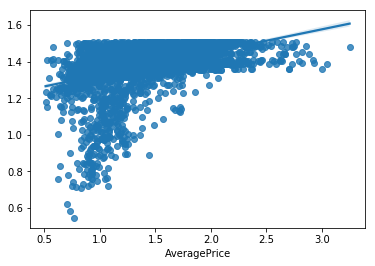

In [269]:
reg8 = SVR(kernel='rbf',C=1,gamma=0.6).fit(X_train,y_train)
y_pred1 = reg8.predict(X_test)
y_pred2 = reg8.predict(X_train)
print("Training Score:",reg8.score(X_train,y_train))
print("Validation Score:",reg8.score(X_test,y_test))
print()
print("Training Data RMSE:",np.sqrt(mean_squared_error(y_train,y_pred2)))
#a = cross_val_score(reg8,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
print("%.3f (+/-%.3f)"%(a.mean(),a.std()))
print()
print("Validation Data RMSE:",np.sqrt(mean_squared_error(y_test,y_pred1)))
#a = cross_val_score(reg8,X_test,y_test,scoring='neg_mean_squared_error',cv=5)
print("%.3f (+/-%.3f)"%(a.mean(),a.std()))
sns.regplot(x=y_test,y=y_pred1,truncate=True)

Training Score: 0.7260398917352165
Validation Score: 0.6063359561795469

Training Data RMSE: 0.21053112078066757

Validation Data RMSE: 0.25373313801560304


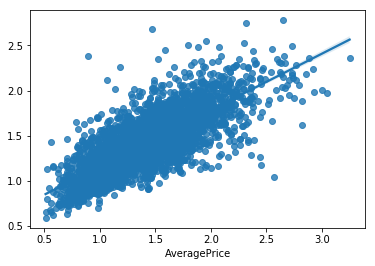

In [288]:
from sklearn.neighbors import KNeighborsRegressor
reg9 = KNeighborsRegressor(n_neighbors=6,leaf_size=10).fit(X_train,y_train)
y_pred1 = reg9.predict(X_test)
y_pred2 = reg9.predict(X_train)
print("Training Score:",reg9.score(X_train,y_train))
print("Validation Score:",reg9.score(X_test,y_test))
print()
print("Training Data RMSE:",np.sqrt(mean_squared_error(y_train,y_pred2)))
#a = cross_val_score(reg9,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
#print("%.3f (+/-%.3f)"%(a.mean(),a.std()))
print()
print("Validation Data RMSE:",np.sqrt(mean_squared_error(y_test,y_pred1)))
#a = cross_val_score(reg9,X_test,y_test,scoring='neg_mean_squared_error',cv=5)
#print("%.3f (+/-%.3f)"%(a.mean(),a.std()))
sns.regplot(x=y_test,y=y_pred1,truncate=True)